In [73]:
# Objetivo: detectar qué productos son los más comprados por ciertos grupos etarios.
# Subgrupos 18–24, 25–30, 31–35 , 35-99

<h4>1.Fase de Análisis exploratorio</h4>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [76]:
df_customer = pd.read_csv('https://raw.githubusercontent.com/micaelakorol21/datasets/refs/heads/main/customer_data.csv')

In [77]:
df_customer.shape

(100000, 12)

In [79]:
df_customer.isna().sum()

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [80]:
df_customer.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [81]:
# Observamos el promedio de ingreso:
df_customer['income'].describe()

count    100000.000000
mean      27516.269880
std       12996.782587
min        5000.000000
25%       16271.750000
50%       27584.500000
75%       38747.250000
max       50000.000000
Name: income, dtype: float64

In [82]:
# Importe de la compra promedio entre hombres y mujeres:
df_customer.groupby("gender")["purchase_amount"].mean()

gender
Female    9634.404601
Male      9635.178224
Name: purchase_amount, dtype: float64

In [83]:
# Categorias mas vendidas
df_customer.groupby("product_category")["purchase_amount"].mean()

product_category
Beauty         9721.366038
Books          9592.935678
Clothing       9634.595327
Electronics    9648.226696
Food           9669.953110
Health         9610.963647
Home           9538.173262
Name: purchase_amount, dtype: float64

In [84]:
# Cuantas categorias hay:
df_customer['product_category'].value_counts()

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

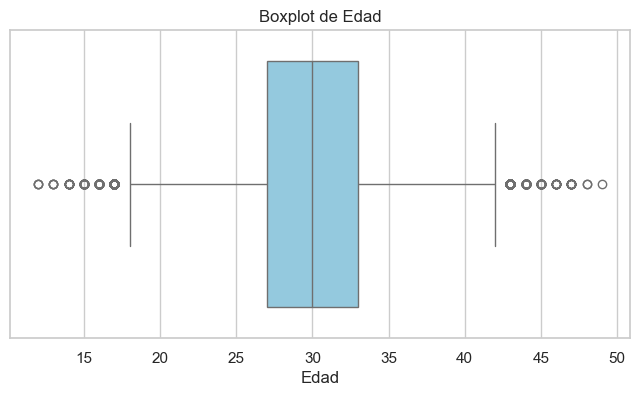

In [85]:
sns.set(style="whitegrid")

# Boxplot de edad
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_customer["age"], color="skyblue")
plt.title("Boxplot de Edad")
plt.xlabel("Edad")
plt.show()

In [86]:
df_customer['age'].describe()

count    100000.000000
mean         30.003260
std           4.480535
min          12.000000
25%          27.000000
50%          30.000000
75%          33.000000
max          49.000000
Name: age, dtype: float64

In [87]:
# Eliminamos los menores de 18 años, ya qye nuestro análisis se centra > 18 hasta 99 años.

In [88]:
df_customer = df_customer[df_customer['age'] >= 18]

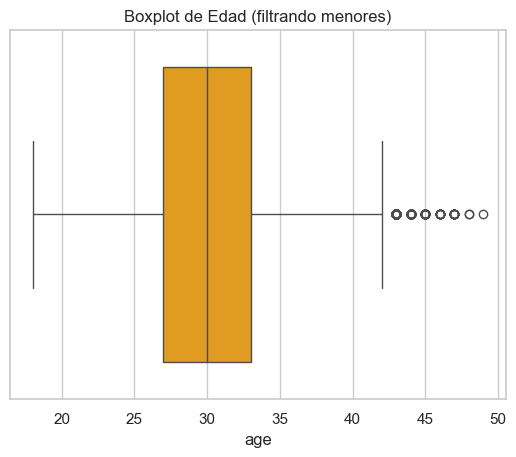

In [89]:
sns.boxplot(x=df_customer["age"], color="orange")
plt.title("Boxplot de Edad (filtrando menores)")
plt.show()

<h4>Analizamos la columna gender: </h4>

In [91]:
# Cuántos registros hay de cada género:
df_customer['gender'].value_counts()

gender
Female    49953
Male      49779
Name: count, dtype: int64

In [92]:
# Porcentaje de representación de cada género:
df_customer['gender'].value_counts(normalize=True) * 100

gender
Female    50.087234
Male      49.912766
Name: proportion, dtype: float64

In [93]:
# Gasto promedio por género:
df_customer.groupby('gender')['purchase_amount'].mean()

gender
Female    9633.442896
Male      9634.217742
Name: purchase_amount, dtype: float64

<Axes: xlabel='gender', ylabel='purchase_amount'>

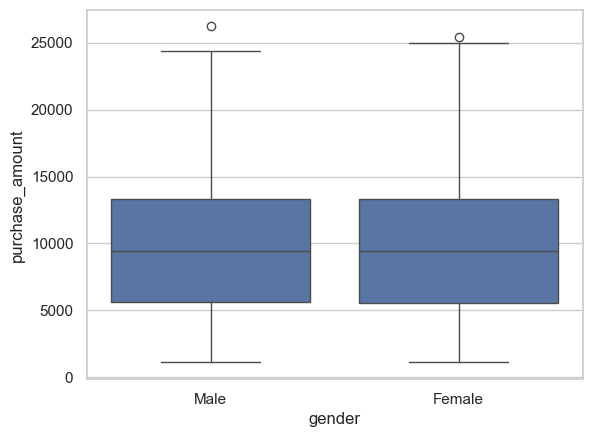

In [94]:
sns.boxplot(data=df_customer, x='gender', y='purchase_amount')

In [95]:
# El 25% de los compradores, gastó $6000 aprox.
# El 50% de los compradores, gastó 9500 aprox.
# El otro 25% gastó 13.500 aprox. El 75% de los compradores, gastó menos que Q3.

In [96]:
# Frecuencia de compra por género
df_customer.groupby('gender')['purchase_frequency'].value_counts(normalize=True)

gender  purchase_frequency
Female  rare                  0.500951
        occasional            0.298140
        frequent              0.200909
Male    rare                  0.499427
        occasional            0.299564
        frequent              0.201008
Name: proportion, dtype: float64

In [115]:
# Preferencias de categoria 
df_customer.groupby('gender')['product_category'].value_counts()

gender  product_category
Female  Electronics         15054
        Clothing            10032
        Food                 7445
        Books                7408
        Health               5038
        Home                 2516
        Beauty               2460
Male    Electronics         14903
        Clothing             9901
        Books                7470
        Food                 7340
        Health               5055
        Beauty               2564
        Home                 2546
Name: count, dtype: int64

In [129]:
# Calculamos la frecuencia absoluta y la proporción de categorías de productos para un género específico con una función reutilziable.
def get_gender_product_proportions(df_customer, gender):
    # Cuenta cuántas veces aparece cada combinación de género y categoría.
    counts = df_customer.groupby(['gender', 'product_category']).size().reset_index(name='count')
    # Total de compras para cada género
    totals = counts.groupby('gender')['count'].transform('sum')
    # Proporción de cada categoría dentro de un género
    counts['proportion'] = counts['count'] / totals

    gender_counts = counts[counts['gender'] == gender]

    return gender_counts

In [131]:
female_data = get_gender_product_proportions(df_customer, 'Female')
print(female_data.head())

   gender product_category  count  proportion
0  Female           Beauty   2460    0.049246
1  Female            Books   7408    0.148299
2  Female         Clothing  10032    0.200829
3  Female      Electronics  15054    0.301363
4  Female             Food   7445    0.149040


<p>Las mujeres gastan más en categorias como: Electrónica 30%, Ropa 20% y comida 14%.</p>
<p>Además, el 4.92% de las compras de mujeres fueron de productos de belleza y 14% en compras de libros.</p>

In [135]:
male_data = get_gender_product_proportions(df_customer, 'Male')
print(male_data.head())

   gender product_category  count  proportion
7    Male           Beauty   2564    0.051508
8    Male            Books   7470    0.150063
9    Male         Clothing   9901    0.198899
10   Male      Electronics  14903    0.299383
11   Male             Food   7340    0.147452


<p>Los hombres gastan más en categorias como: Electrónica, Ropa, Libros y Comida.</p>

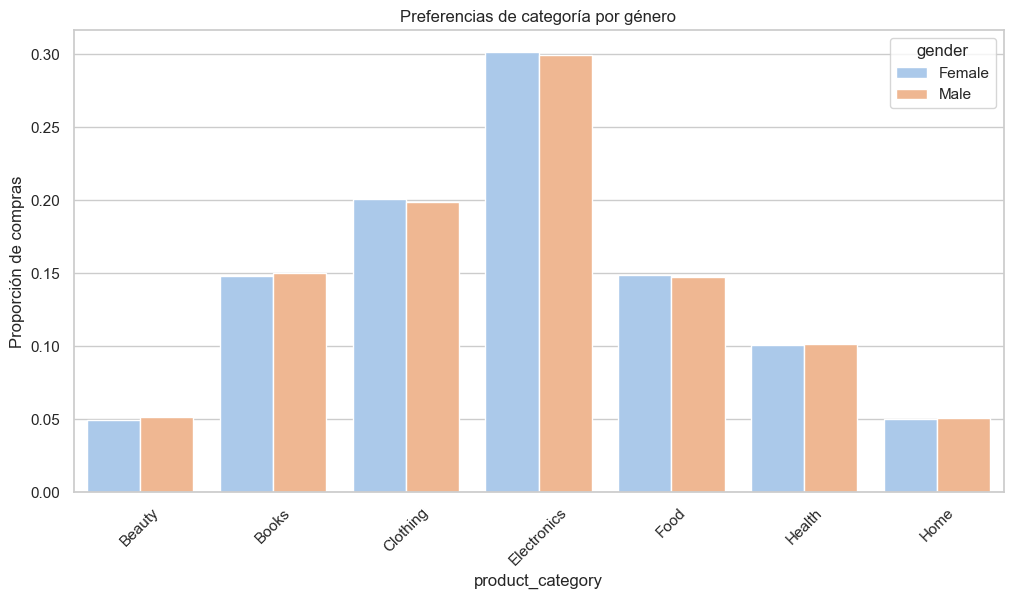

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(data=counts, x='product_category', y='proportion', hue='gender', palette='pastel')
plt.title('Preferencias de categoría por género')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

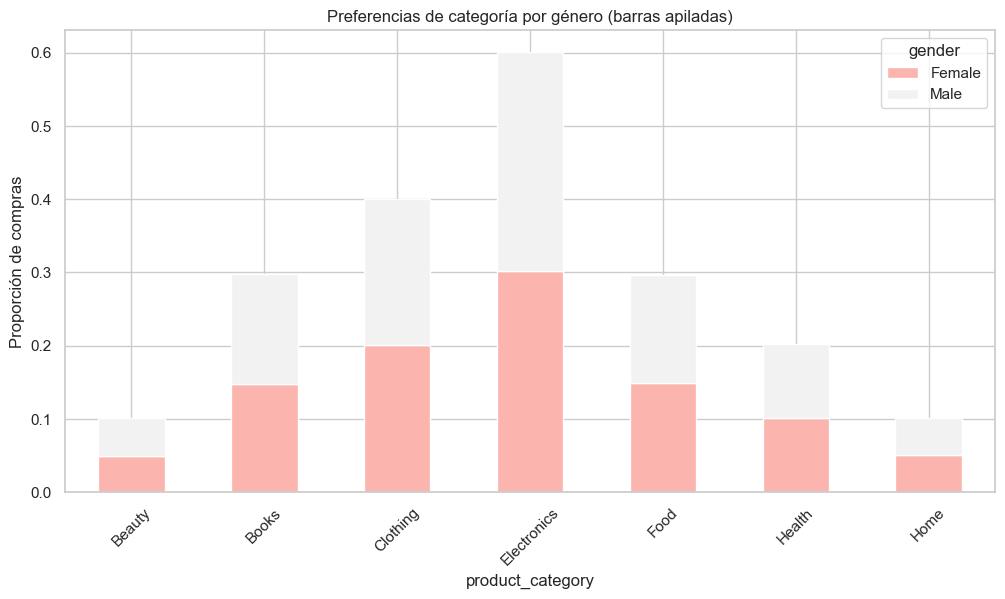

In [142]:
pivot_df = counts.pivot(index='product_category', columns='gender', values='proportion')

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1')
plt.title('Preferencias de categoría por género (barras apiladas)')
plt.ylabel('Proporción de compras')
plt.xticks(rotation=45)
plt.show()

<b>La distribución y preferencias de productos entre hombres y mujeres son muy similares, lo que coincide con que ambos géneros están representados casi por igual en la muestra.</b>

In [144]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Columna 'Ingresos'</h4>

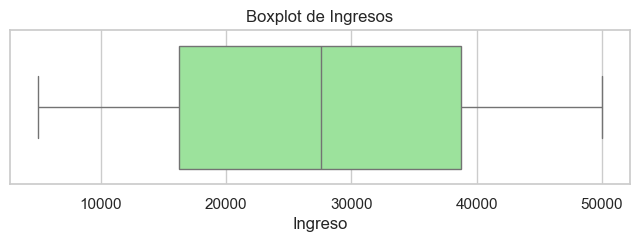

In [147]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['income'], color='lightgreen')
plt.title('Boxplot de Ingresos')
plt.xlabel('Ingreso')
plt.show()

<b>Los valores están razonablemente distribuidos y no hay ingresos extremos que puedan distorsionar el análisis </b>

In [149]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Análisis de la columna "Educación" </h4>

In [152]:
df_customer['education'].value_counts()

education
College       39768
Bachelor      30194
HighSchool    19982
Masters        9788
Name: count, dtype: int64

<h4>Análisis de la columna "Fidelidad" </h4>

In [155]:
df_customer['loyalty_status'].dtype

dtype('O')

In [160]:
df_customer['loyalty_status'].value_counts()

loyalty_status
Regular    59985
Silver     29876
Gold        9871
Name: count, dtype: int64

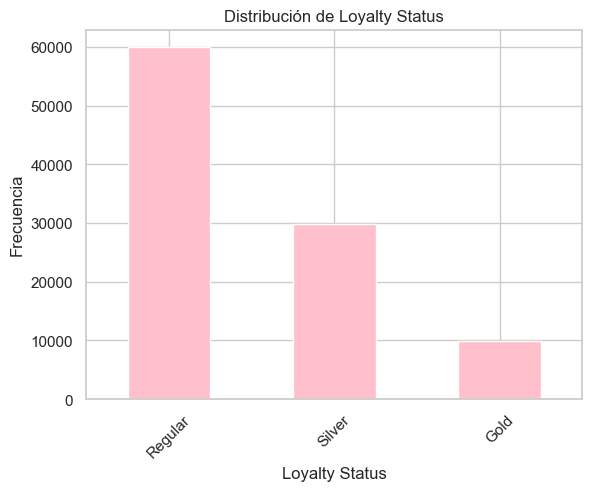

In [178]:
import matplotlib.pyplot as plt

df_customer['loyalty_status'].value_counts().plot(kind='bar', color='pink')
plt.title('Distribución de Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

<p>Esto podría indicar que, aunque se tiene un número considerable de clientes leales (como los de Gold o Silver), la mayoría de tus clientes no alcanzan un nivel de lealtad muy alto, sino que están en un punto medio Regular.</p>

<h4>Análisis de la columna "frecuencia_compra" </h4>

In [158]:
df_customer['purchase_frequency'].dtype

dtype('O')

In [180]:
df_customer['purchase_frequency'].value_counts() 

purchase_frequency
rare          49885
occasional    29805
frequent      20042
Name: count, dtype: int64

In [182]:
# Datos
frecuencia = {
    'rare': 49885,
    'occasional': 29805,
    'frequent': 20042
}

# Total de registros
total = sum(frecuencia.values())

# Calcular proporciones
proporciones = {key: value / total for key, value in frecuencia.items()}
print(proporciones)

{'rare': 0.5001905105683231, 'occasional': 0.2988509204668512, 'frequent': 0.20095856896482572}


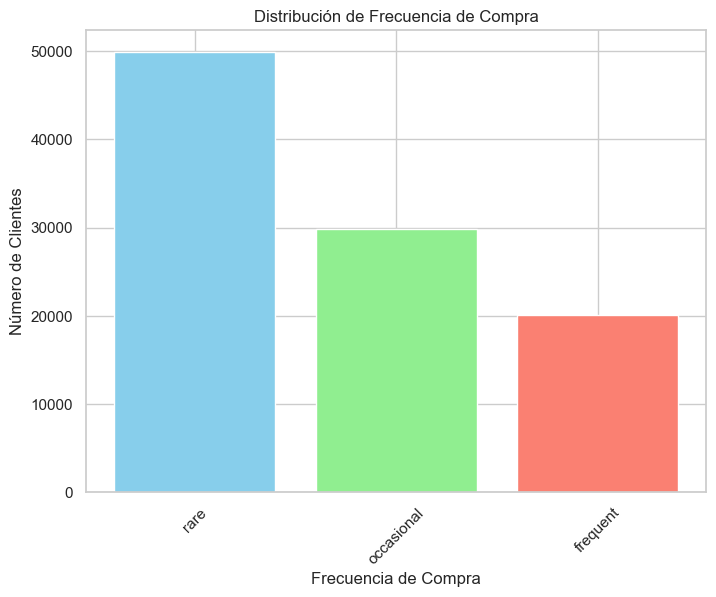

In [186]:
import matplotlib.pyplot as plt

# Datos para gráfico
categorias = list(frecuencia.keys())
valores = list(frecuencia.values())

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.bar(categorias, valores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribución de Frecuencia de Compra')
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.show()

<p> El 50% de los clientes compran raramente, el 30% ocasionalmente y solo el 20% frecuentemente. </p>

In [191]:
df_customer.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

<h4>Columna "purchase_amount": </h4>

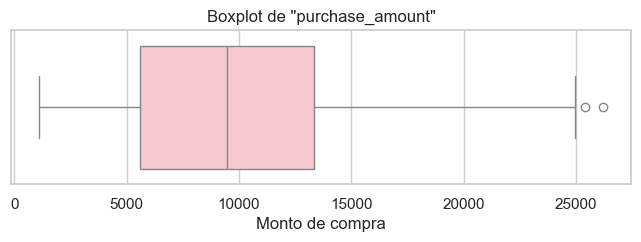

In [195]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['purchase_amount'], color='pink')
plt.title('Boxplot de "purchase_amount"')
plt.xlabel('Monto de compra')
plt.show()

<b>En el análisis de los montos de compra, observamos algunos valores atípicos (outliers) que representan compras mucho más altas que el promedio. Estos valores son representados por los círculos fuera del rango en el boxplot. Aunque estos puntos se consideren técnicamente outliers, no los eliminaremos del análisis, ya que representan clientes de alto gasto y pueden ser fundamentales para entender ciertos patrones de consumo.</b>

<h4>Columna "product_category": </h4>

In [229]:
print(df_customer['product_category'].dtype)

object


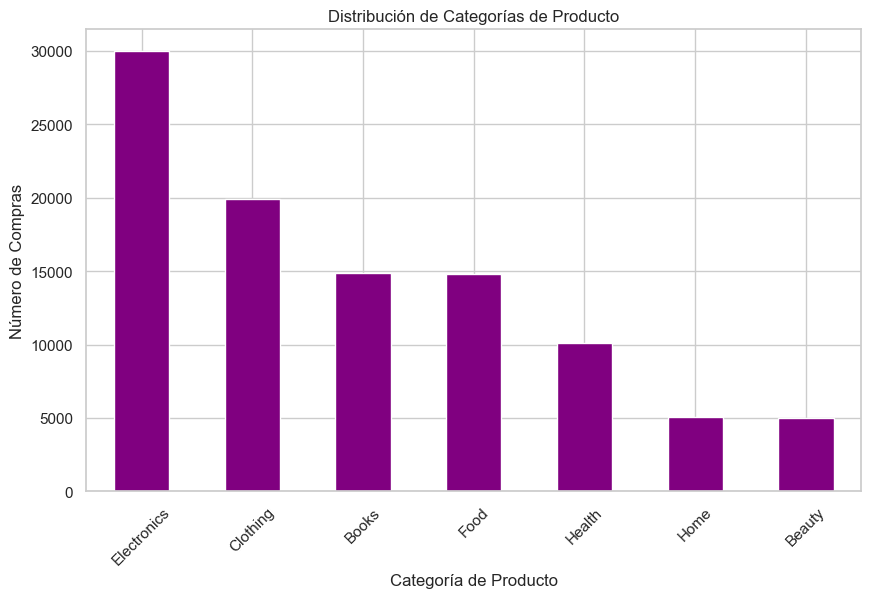

In [209]:
category_counts = df_customer['product_category'].value_counts()
# Gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='purple')
plt.title('Distribución de Categorías de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

<h4>Columna "promotion_usage": </h4>

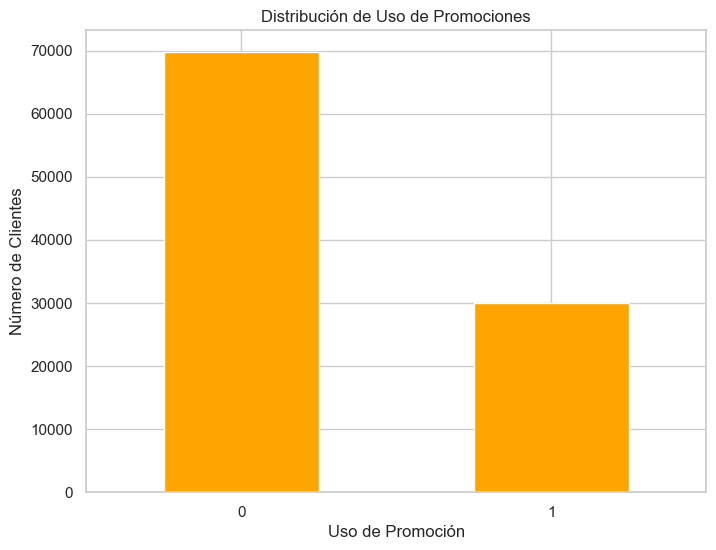

In [219]:
# Distribución de uso de promociones
promotion_usage_counts = df_customer['promotion_usage'].value_counts()

# Gráfico de barras
plt.figure(figsize=(8, 6))
promotion_usage_counts.plot(kind='bar', color='orange')
plt.title('Distribución de Uso de Promociones')
plt.xlabel('Uso de Promoción')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()
# 0 indica que el cliente no usa promociones
# 1 indica que el cliente usa promociones

<b>Podemos observar que la mayoria de los clientes no aprovechan las promociones.</b>

<h4>Análisis de la columna: "satisfaction_score"</h4>

In [227]:
print(df_customer['satisfaction_score'].dtype)

int64


In [235]:
# Ver los valores únicos de la columna 'satisfaction_score'
print(df_customer['satisfaction_score'].unique())

[ 6  7  5  3  4  2  8  9  1 10  0]


In [231]:
df_customer['satisfaction_score'].describe()

count    99732.000000
mean         5.009576
std          1.038846
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: satisfaction_score, dtype: float64

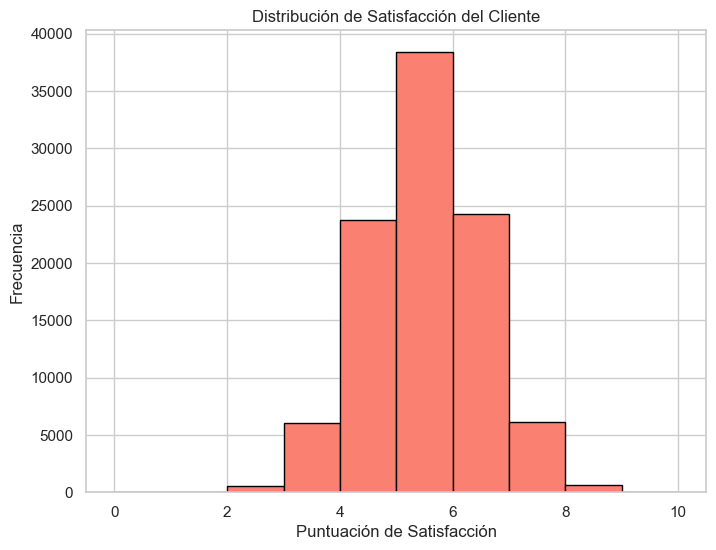

In [225]:
# Histograma de Rango de satisfacción de 0 a 10.
plt.figure(figsize=(8, 6))
df_customer['satisfaction_score'].plot(kind='hist', bins=10, color='salmon', edgecolor='black')
plt.title('Distribución de Satisfacción del Cliente')
plt.xlabel('Puntuación de Satisfacción')
plt.ylabel('Frecuencia')
plt.show()

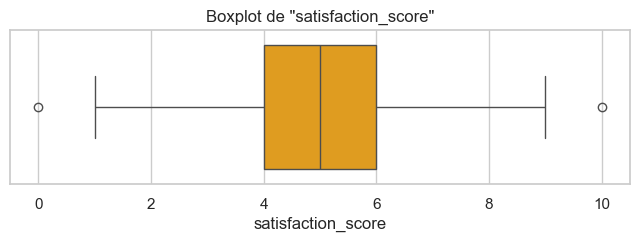

In [245]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_customer['satisfaction_score'], color='orange')
plt.title('Boxplot de "satisfaction_score"')
plt.xlabel('satisfaction_score')
plt.show()

<b>Al observar la distribución de los puntajes de satisfacción, podemos ver que la mayoría de los clientes se encuentran en los valores centrales de la escala, con una ligera inclinación hacia la satisfacción (valores cercanos a 5 y 6). Esto indica que muchos clientes se sienten satisfechos o neutros con su experiencia.</b> <br>
<b>En el boxplot de la distribución de los puntajes de satisfacción, podemos observar que los valores de 0 y 10 están fuera del rango intercuartílico y se identifican como outliers. Sin embargo, estos valores no serán eliminados, ya que representan extremos válidos de la escala: 0  muy insatisfecho, 10 muy satisfecho.</b>

In [ ]:
# Observar features más importantes
# Realizar discretización por grupo etario

<h3>Mapa de correlacion entre variables: Muestra qué variables están más relacionadas entre sí.</h3>

<Axes: >

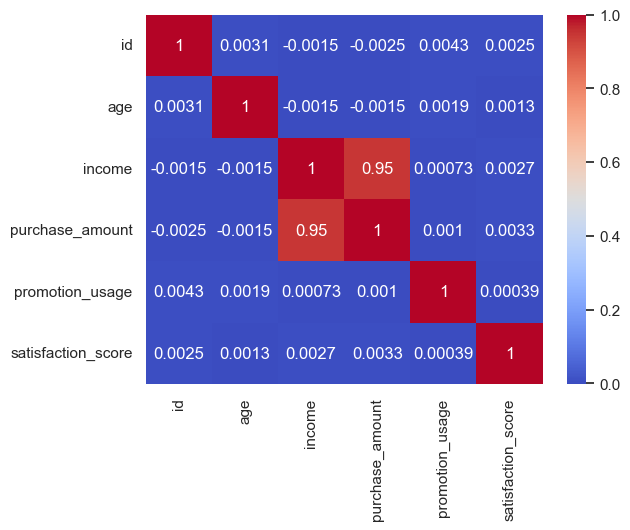

In [250]:
sns.heatmap(df_customer.corr(numeric_only=True), annot=True, cmap="coolwarm")

In [ ]:
# El ingreso de una persona esta relacionado con lo que gasta.
# La edad con la puntuación de satisfacción esta fuertemente relacionada.
# El uso de promociones esta algo relacionado con el ingreso.

In [265]:
# Discretización de variables:
bins = [18, 24, 30, 35, 100]  # Rango: 18-24, 25-30, 31-35, 36-99
labels = ['18-24', '25-30', '31-35', '36-99']

# Creamos una nueva columna de grupo etario
df_customer['age_group'] = pd.cut(df_customer['age'], bins=bins, labels=labels, right=False)

df_customer[['age_group']].head()

,age_group
0,25-30
1,25-30
2,36-99
3,31-35
4,31-35


In [267]:
# Ver que productos compran más los grupos etarios
# Graficar

<h4> - </h4>
<p>Aunque el objetivo principal de este análisis era detectar qué productos son los más comprados por ciertos grupos etarios, se optó por explorar todas las columnas del dataset en primer lugar. Esta estrategia permitió obtener una comprensión más profunda de los datos y sus relaciones, lo cual no solo aporta valor al análisis actual, sino que también abre la puerta a futuros estudios.</p>